In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import json

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [4]:
import os
os.chdir('E:\\youtube')

In [5]:
videos = pd.read_csv('USvideos.csv',encoding='utf8',error_bad_lines = False);#opening the file USvideos
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\py\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pol=[] # list which will contain the polarity of the comments

In [13]:
print(comm.comment_text.values)

["Logan Paul it's yo big day ‼️‼️‼️"
 "I've been following you from the start of your vine channel and have seen all 365 vlogs"
 'Say hi to Kong and maverick for me' ... 'Ven a mexico! 😍 te amo LP'
 'Islığı yeter...'
 'Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ... moja colonna sonora😘']


In [14]:
print(comm.comment_text.keys)

<bound method Series.keys of 0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
5                                   #1 on trending AYYEEEEE
6                                      The end though 😭👍🏻❤️
7                                      #1 trending!!!!!!!!!
8                               Happy one year vlogaversary
9         You and your shit brother may have single hand...
10                   There should be a mini Logan Paul too!
11        Dear Logan, I really wanna get your Merch but ...
12        Honestly Evan is so annoying. Like its not fun...
13                         Casey is still better then logan
14            aw geez rick this guy is the face of YouTube.
15                             He happy cause he in a movie
16        A

In [15]:
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [25]:
an = TextBlob("Logan Paul it's yo big day ‼️‼️‼️")
print(an)

Logan Paul it's yo big day ‼️‼️‼️


In [19]:
comm['pol']=pol


In [20]:

comm['pol'][comm.pol==0]= 0


C:\py\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:

comm['pol'][comm.pol > 0]= 1


C:\py\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
comm['pol'][comm.pol < 0]= -1

C:\py\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
print(comm['pol'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         1.0
9        -1.0
10        0.0
11        1.0
12       -1.0
13        1.0
14        0.0
15        1.0
16       -1.0
17        0.0
18        1.0
19       -1.0
20        0.0
21        0.0
22        1.0
23        0.0
24        1.0
25        0.0
26        0.0
27        1.0
28       -1.0
29        1.0
         ... 
691370    0.0
691371    0.0
691372    0.0
691373    1.0
691374    0.0
691375    0.0
691376    0.0
691377    0.0
691378    0.0
691379    0.0
691380    0.0
691381    0.0
691382    1.0
691383    1.0
691384    0.0
691385    0.0
691386    0.0
691387    0.0
691388    1.0
691389    1.0
691390    1.0
691391    1.0
691392    0.0
691393    1.0
691394    0.0
691395    0.0
691396    0.0
691397    0.0
691398    0.0
691399    0.0
Name: pol, Length: 691400, dtype: float64


In [26]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


In [28]:
k= (' '.join(df_positive['comment_text']))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(-0.5, 999.5, 499.5, -0.5)

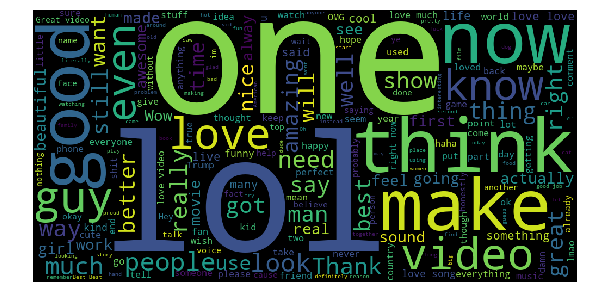

In [31]:
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

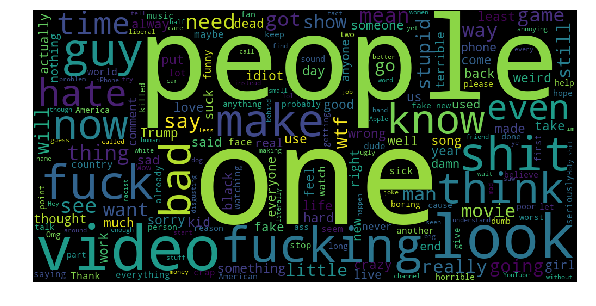

In [32]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

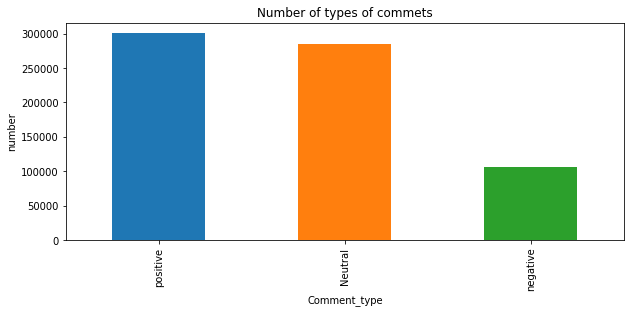

In [34]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(10,4));
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [35]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]

In [38]:
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [39]:
#this is the most handful thing for analysis. Lets see its EDA in EDA section
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,k1gVVnv_om4,50,21,90,161
1,9VjKMTwFXMw,46,4,450,500
2,PlTRnF7KlV4,26,23,51,100
3,uKQ8iy3U1lw,206,123,171,500
4,xU5-_EGfcHw,71,44,85,200
5,0d6eJcWYqBc,78,7,15,100


In [41]:
df_unique.to_csv('unique.csv',index=False,)

In [42]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [43]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [44]:
videos.date.value_counts()

12.10    200
4.10     200
20.10    200
5.10     200
18.10    200
15.10    200
16.10    200
29.09    200
1.10     200
14.10    200
11.10    200
23.09    200
15.09    200
2.10     200
21.09    200
14.09    200
13.10    200
17.09    200
21.10    200
3.10     200
22.10    200
16.09    200
19.10    200
10.10    200
17.10    200
7.10     200
30.09    200
28.09    200
13.09    200
22.09    200
8.10     200
20.09    200
19.09    200
6.10     200
18.09    200
25.09    199
24.09    199
27.09    199
26.09    199
9.10     196
Name: date, dtype: int64

In [45]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

Oo0NJsr5m4I    8
Hlt3rA-oDao    8
LunHybOKIjU    8
SHq2qrFUlGY    7
4X6a3G_0HjY    7
j5YSOabmFgw    7
5Xe0Qd6bUFo    7
dInwVhRtN4E    7
M16CGK1T9MM    7
bu9e410C__I    7
rgbnZG85IRo    7
OlI8r3nNUVw    7
Name: video_id, dtype: int64


In [46]:
videos[videos.video_id=='mlxdnyfkWKQ']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1647,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93109,1642,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1650,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93153,1644,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1855,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],115720,1747,89,313,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,22.09
2129,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],135303,1781,92,252,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,23.09
2337,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],141666,1790,94,254,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,24.09
2561,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,161606,1823,97,257,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,25.09
2790,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,201549,1944,101,260,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,26.09


In [47]:
for i in most_trending:
    info =videos[videos.video_id== i][['title','channel_title','views','likes','dislikes','comment_total']].tail(1)# get the last row of the dataframe(total like,views,dislikes)
    print(info)
    print('****************************************************************************************')

                                                  title channel_title  \
7184  Tourist terrified by new glass walkway that cr...          CGTN   

        views  likes  dislikes  comment_total  
7184  5145601  38234      7372           6861  
****************************************************************************************
                title        channel_title    views   likes  dislikes  \
7982  Kellywise - SNL  Saturday Night Live  6845621  132302      8213   

      comment_total  
7982           9309  
****************************************************************************************
                                                  title channel_title  \
7135  Eminem Rips Donald Trump In BET Hip Hop Awards...   BETNetworks   

         views   likes  dislikes  comment_total  
7135  33191594  982842    184310         337603  
****************************************************************************************
                                                  ti

In [48]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
5       a24|a24 films|a24 trailers|independent films|t...
6       Late night|Seth Meyers|check in|hud|Ben Carson...
7       iPhone X|iphone x|iphone 10|iPhone X impressio...
8       Roman Atwood|Roman|Atwood|roman atwood vlogs|f...
9       screenjunkies|screen junkies|screenjunkies new...
10      Collegehumor|CH originals|comedy|sketch comedy...
11      best floyd mayweather interview|awkward|puppet...
12      The Tonight Show|Jimmy Fallon|Jennifer Lawrenc...
13      mtv|video|online|official|tv|television|watch|...
14      America's Got Talent 2017|america's got talent...
15      Apple|iPhone X|iPhone 8|iPhone X unboxing|Appl...
16      panda|what should we eat|buzzfeed|comedy|boyfr...
17      skit|k

In [50]:
# slpitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 
print(tags)

[list(['logan paul vlog', 'logan paul', 'logan', 'paul', 'olympics', 'logan paul youtube', 'vlog', 'daily', 'comedy', 'hollywood', 'parrot', 'maverick', 'bird', 'maverick clothes', 'diamond play button', 'logan paul diamond play button', '10m subscribers', 'logan paul 1 year vlogging', '1 year vlog', 'dwarf mamba play button', 'logan paul history', 'youtube history', '10m', '10m plaque', 'youtube button', 'diamond button', 'logang', 'logang 4 life'])
 list(['apple', 'iphone 10', 'iphone ten', 'iphone', 'portrait lighting', 'a11 bionic', 'augmented reality', 'emoji', 'animoji', 'face id', 'apple pay', 'camera', 'smartphone'])
 list(['[none]']) ...
 list(['lp', 'death valley', 'other people', 'lost on you', 'the mckittrick hotel', 'live'])
 list(['youtube fanfest', '#ytff', 'washington dc', 'usa', 'ytff', '#youtubeblack', 'howard university', 'homecoming 2017', 'youtube black howard homecoming 2017', 'black creators', 'alonzo lerone', 'ambers closet', 'dainá', 'daniel caesar', 'dormtainm

In [52]:
# joining and making a complete list
k= (' '.join(videos['tags']))  
print(k)

logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar w

(-0.5, 999.5, 499.5, -0.5)

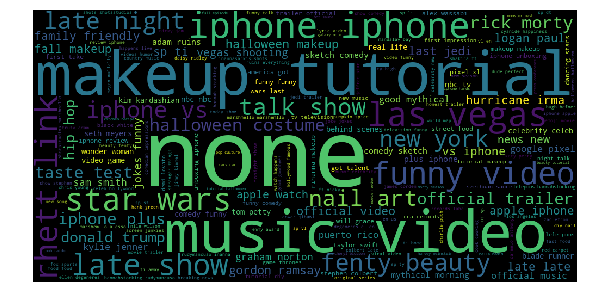

In [54]:
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [55]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [57]:
df1 =pd.DataFrame(videos.channel_title.value_counts())
print(df1)

                                         channel_title
Vox                                                 40
Jimmy Kimmel Live                                   40
First We Feast                                      39
jacksfilms                                          38
NFL                                                 38
The Tonight Show Starring Jimmy Fallon              38
vlogbrothers                                        38
TheEllenShow                                        38
Netflix                                             37
CollegeHumor                                        37
The Late Late Show with James Corden                37
Refinery29                                          36
Marques Brownlee                                    34
Safiya Nygaard                                      34
Good Mythical Morning                               32
Amber Scholl                                        32
Rosanna Pansino                                     32
Late Night

In [59]:
df1.columns=['times channel got trenidng']# how many times the channel got trending'
df1.head(6)

,times channel got trenidng
Vox,40
Jimmy Kimmel Live,40
First We Feast,39
jacksfilms,38
NFL,38
The Tonight Show Starring Jimmy Fallon,38


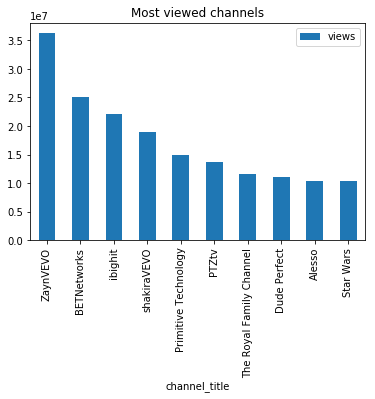

In [60]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most viewed channels');

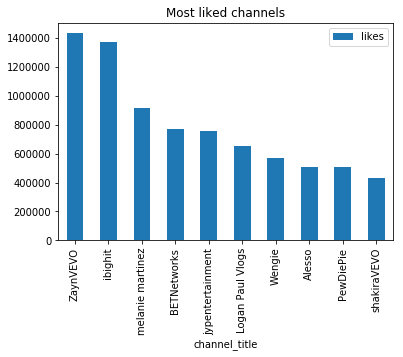

In [61]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

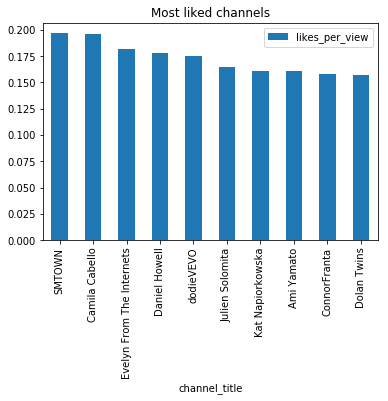

In [62]:
#Inference -Zayn vevo also leads for the mostly liked vidoes
videos['likes_per_view']=videos['likes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

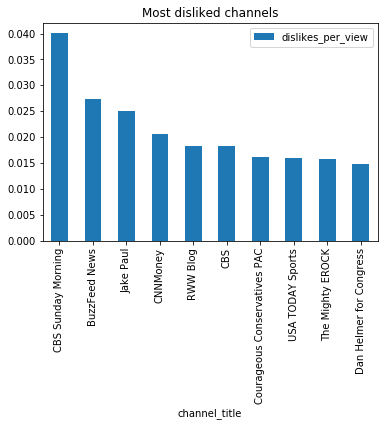

In [63]:
#disliked videos
videos['dislikes_per_view']=videos['dislikes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');

In [64]:
#Now i am going import a Unique file created in sentimental analysis section
unique = pd.read_csv('unique.csv',)

In [65]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

,id,pos_comm,neg_comm,neutral_comm,total_comments
535,eERPlIdPJtI,426,32,142,600
598,Zmi9iQp6944,411,55,34,500
862,udnGW3E1vxY,404,51,242,697
120,xTyTQgb-y-A,401,40,127,568
1924,zKriLekFPwg,399,46,255,700


In [69]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

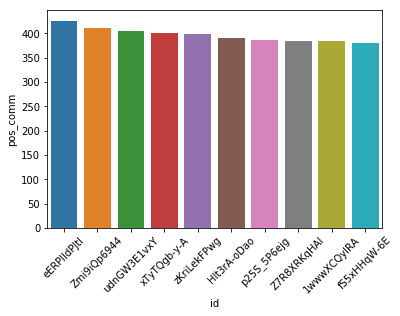

<Figure size 360x288 with 0 Axes>

In [70]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

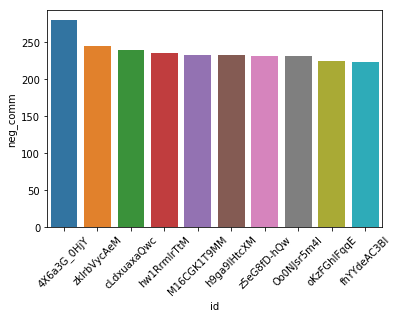

<Figure size 360x288 with 0 Axes>

In [71]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

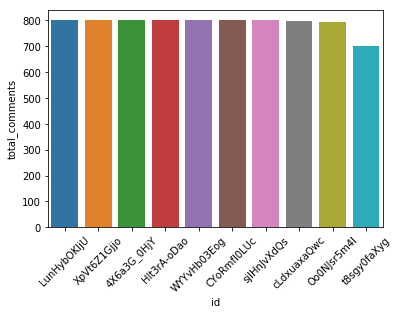

<Figure size 360x288 with 0 Axes>

In [72]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

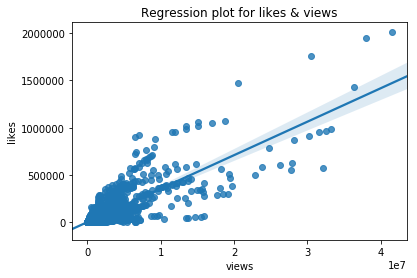

In [73]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

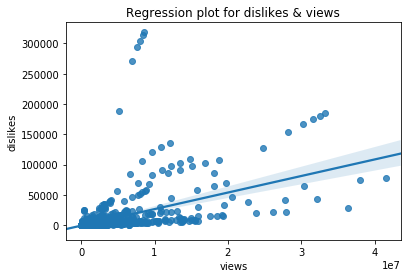

In [74]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");


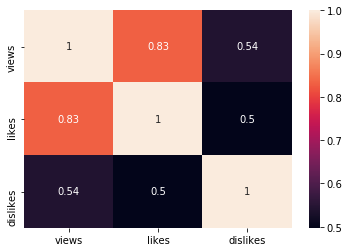

In [75]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)